Task 1

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [23]:
data =pd.read_csv("/content/drive/MyDrive/Dataware housing lab/Preprocessing_Data.csv")
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [24]:
bool_series = pd.isnull(data["Salary"])
data[bool_series]

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes


In [25]:
min_value = data["Salary"].min()

data['Salary'] = data['Salary'].fillna(min_value)



In [26]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,48000.0,Yes


In [27]:
encoding=pd.get_dummies(data)
print(encoding)

    Age   Salary  Country_France  Country_Germany  Country_Spain  \
0  44.0  72000.0            True            False          False   
1  27.0  48000.0           False            False           True   
2  30.0  54000.0           False             True          False   
3  38.0  61000.0           False            False           True   
4  40.0  48000.0           False             True          False   
5  35.0  58000.0            True            False          False   
6   NaN  52000.0           False            False           True   
7  48.0  79000.0            True            False          False   
8  50.0  83000.0           False             True          False   
9  37.0  67000.0            True            False          False   

   Purchased_No  Purchased_Yes  
0          True          False  
1         False           True  
2          True          False  
3          True          False  
4         False           True  
5         False           True  
6          True     

In [29]:
numerical_columns = ['Age', 'Salary']
min_max_scaler = MinMaxScaler()
df_min_max_scaled = data.copy()
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])

print(df_min_max_scaled)


   Country       Age    Salary Purchased
0   France  0.739130  0.685714        No
1    Spain  0.000000  0.000000       Yes
2  Germany  0.130435  0.171429        No
3    Spain  0.478261  0.371429        No
4  Germany  0.565217  0.000000       Yes
5   France  0.347826  0.285714       Yes
6    Spain       NaN  0.114286        No
7   France  0.913043  0.885714       Yes
8  Germany  1.000000  1.000000        No
9   France  0.434783  0.542857       Yes


Task 2

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:


data_path = '/content/drive/MyDrive/Dataware housing lab/Haberman_Cancer_survivalData.csv'
column_names = ['Age', 'Operation_Year', 'Axil_Nodes', 'Survival_Status']
df = pd.read_csv(data_path, header=None, names=column_names)


In [42]:


print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_Year   306 non-null    int64
 2   Axil_Nodes       306 non-null    int64
 3   Survival_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB

Summary Statistics:
               Age  Operation_Year  Axil_Nodes  Survival_Status
count  306.000000      306.000000  306.000000       306.000000
mean    52.457516       62.852941    4.026144         1.264706
std     10.803452        3.249405    7.189654         0.441899
min     30.000000       58.000000    0.000000         1.000000
25%     44.000000       60.000000    0.000000         1.000000
50%     52.000000       63.000000    1.000000         1.000000
75%     60.750000       65.750000    4.000000         2.000000
max     83.000000       69.000000   52.000000       

In [43]:

age_survival = df.groupby(['Age', 'Survival_Status']).size().unstack(fill_value=0)
print("\nAge vs Survival Counts:\n", age_survival)



Age vs Survival Counts:
 Survival_Status   1  2
Age                   
30                3  0
31                2  0
33                2  0
34                5  2
35                2  0
36                2  0
37                6  0
38                9  1
39                5  1
40                3  0
41                7  3
42                7  2
43                7  4
44                4  3
45                6  3
46                3  4
47                8  3
48                4  3
49                8  2
50               10  2
51                4  2
52               10  4
53                5  6
54                9  4
55                8  2
56                5  2
57                8  3
58                7  0
59                7  1
60                4  2
61                6  3
62                4  3
63                7  1
64                5  0
65                6  4
66                3  2
67                4  2
68                2  0
69                3  1
70                5  2
71      

In [44]:

survival_counts = age_survival.idxmax(axis=0)
print("\nAge range with more survival counts:", survival_counts[1])
print("Age range with more non-survival counts:", survival_counts[2])



Age range with more survival counts: 50
Age range with more non-survival counts: 53


In [45]:

operation_year_survival = df.groupby(['Operation_Year', 'Survival_Status']).size().unstack(fill_value=0)
print("\nOperation Year vs Survival Counts:\n", operation_year_survival)



Operation Year vs Survival Counts:
 Survival_Status   1   2
Operation_Year         
58               24  12
59               18   9
60               24   4
61               23   3
62               16   7
63               22   8
64               23   8
65               15  13
66               22   6
67               21   4
68               10   3
69                7   4


In [46]:

operation_year_counts = operation_year_survival.idxmax(axis=0)
print("\nOperation Year range with more survival counts:", operation_year_counts[1])
print("Operation Year range with more non-survival counts:", operation_year_counts[2])



Operation Year range with more survival counts: 58
Operation Year range with more non-survival counts: 65


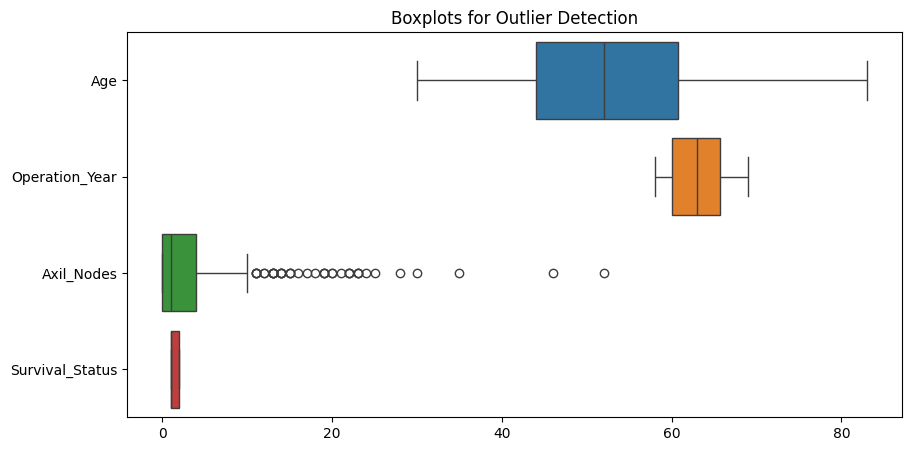

In [47]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient='h')
plt.title("Boxplots for Outlier Detection")
plt.show()


In [48]:

def calculate_iqr(column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    return Q3 - Q1

iqr_age = calculate_iqr('Age')
iqr_operation_year = calculate_iqr('Operation_Year')
iqr_axil_nodes = calculate_iqr('Axil_Nodes')

print(f"\nIQR of Age: {iqr_age}")
print(f"IQR of Operation Year: {iqr_operation_year}")
print(f"IQR of Axil Nodes: {iqr_axil_nodes}")



IQR of Age: 16.75
IQR of Operation Year: 5.75
IQR of Axil Nodes: 4.0


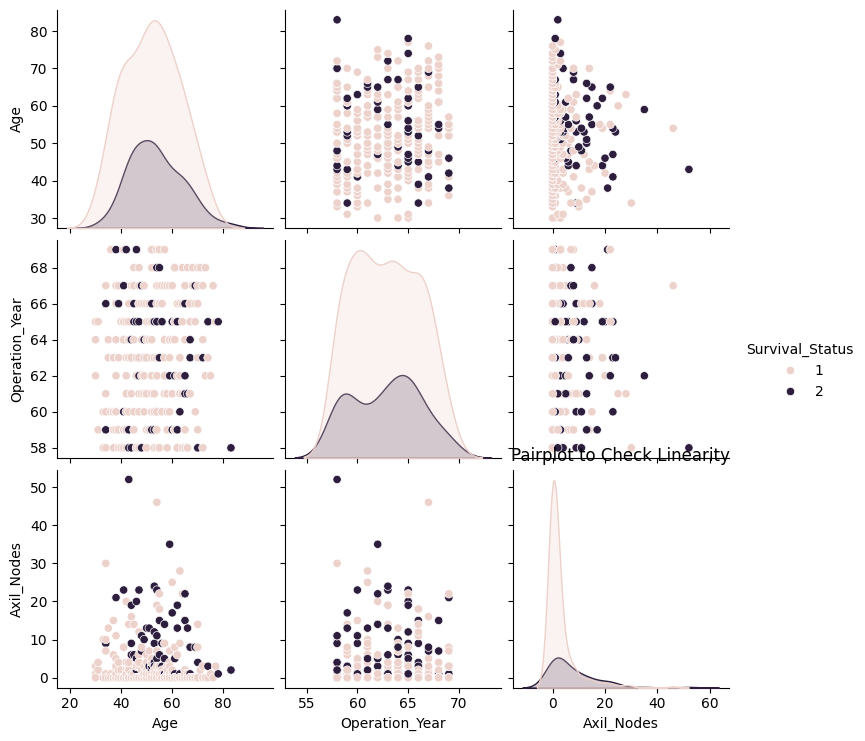

In [49]:

sns.pairplot(df, hue='Survival_Status', vars=['Age', 'Operation_Year', 'Axil_Nodes'])
plt.title("Pairplot to Check Linearity")
plt.show()


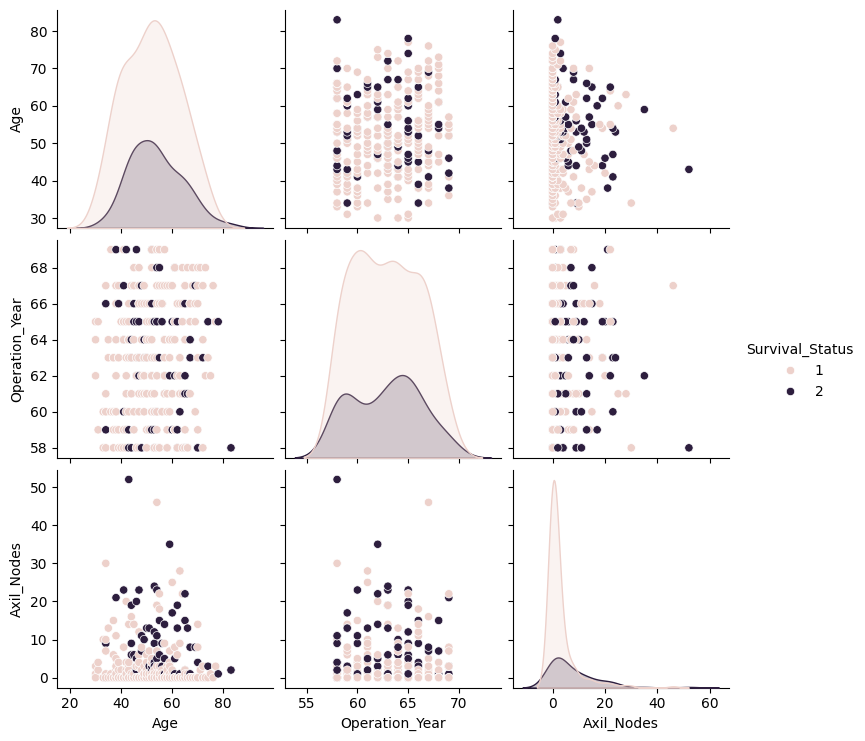

In [50]:

sns.pairplot(df, vars=['Age', 'Operation_Year', 'Axil_Nodes'], diag_kind='kde', hue='Survival_Status')
plt.show()
